In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('/home/ayush/ML_Assignments/ML_assign_4/default of credit card clients.xls')
col = df.iloc[0]
df.columns = col
df = df.iloc[1:,1:]
pd.set_option('display.max_columns', 500)

df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## 2.1 Preprocess 

In [3]:
df.isnull().values.any()

False

In [4]:
df['default payment next month'].value_counts()
#unbalanced data, take note

0    23364
1     6636
Name: default payment next month, dtype: int64

In [5]:
df_1 = pd.get_dummies(df, columns = ['SEX','EDUCATION','MARRIAGE'], drop_first=True)
#handling categorical variables and multicollinearity
df_1.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0
2,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0,1,0,0,0,0,0,1,0
3,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0,1,0,0,0,0,0,1,0
4,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0,1,0,0,0,0,1,0,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,1,0,0,0,0,1,0,0


In [6]:
label = df_1['default payment next month']
df_2 = df_1.drop(['default payment next month'],axis=1)

In [7]:
col = df_2.columns
scaler = MinMaxScaler()
model = scaler.fit(df_2)
df_scaled = pd.DataFrame(model.transform(df_2))
df_scaled.head()
df_scaled.columns = col
df_scaled.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.010101,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.111111,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.080808,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.040404,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.040404,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 2.2 Random-Forest Classifier 

In [8]:
label

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default payment next month, Length: 30000, dtype: object

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, list(label), test_size=0.2, random_state=123)

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=123)
rfc.fit(X_train, list(y_train))
y_pred = rfc.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4696
           1       0.63      0.39      0.48      1304

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



## 2.3 tuning for max depth using GridSearch CV



In [10]:
model_cv = GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4,6,8,10,12,14,16]},
             scoring='accuracy', verbose=0,return_train_score=True)

model_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12, 14, 16]},
             return_train_score=True, scoring='accuracy')

In [11]:
max_depth = [4,6,8,10,12,14,16] 
train_scores_tuned_depth = model_cv.cv_results_['mean_train_score']
print(train_scores_tuned_depth)
test_scores_tuned_depth = model_cv.cv_results_['mean_test_score']
print(test_scores_tuned_depth)

#predicting accuracy for both train and test split for a model trained on that split. this is done to know the best balanced split; we later do averaging.

[0.8135     0.82697917 0.84279167 0.86529167 0.88666667 0.90266667
 0.91952083]
[0.81075    0.81829167 0.819125   0.81808333 0.818375   0.81641667
 0.818375  ]


In [12]:
model_cv.best_params_

{'max_depth': 8}

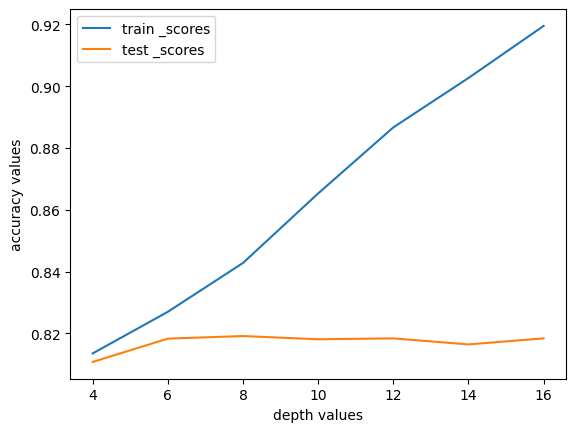

In [13]:
import matplotlib.pyplot as plt

plt.plot(max_depth, train_scores_tuned_depth, label = 'train _scores')
plt.plot(max_depth, test_scores_tuned_depth, label = 'test _scores')
plt.xlabel('depth values')
plt.ylabel('accuracy values')
plt.legend()
plt.show()

In [14]:
#graph shows that as depth increases, model starts overfitting. hence the predictions on train data will increase with depth, while the model being unable to generalise shows decreasing accuracy on test set.

## 2.4 Tuning n estimators:

In [15]:
model_cv_estim = GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100,150,200]},
             scoring='accuracy', verbose=0,return_train_score=True)

model_cv_estim.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200]},
             return_train_score=True, scoring='accuracy')

In [22]:
n_estimators= [100,150,200]
train_scores_tuned_estim = model_cv_estim.cv_results_['mean_train_score']
print(train_scores_tuned_estim)
test_scores_tuned_estim = model_cv_estim.cv_results_['mean_test_score']
print(test_scores_tuned_estim)


[0.9995     0.99952083 0.99952083]
[0.81466667 0.81575    0.81641667]


In [23]:
model_cv_estim.best_params_

{'n_estimators': 200}

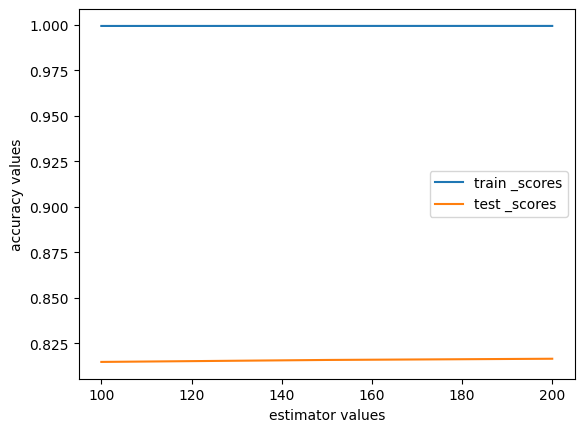

In [24]:
import matplotlib.pyplot as plt

plt.plot(n_estimators, train_scores_tuned_estim, label = 'train _scores')
plt.plot(n_estimators, test_scores_tuned_estim, label = 'test _scores')
plt.xlabel('estimator values')
plt.ylabel('accuracy values')
plt.legend()
plt.show()

In [71]:
# accuracies of train splits better than every corresponding test split. maximum test accuracy at largest no. of splits since model genaralised well

## 2.5 multiple hyperparameter tunning

In [25]:
model_cv_all = GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [100,150,200],'max_depth': [8,10,12], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],'max_features': ['log2', 'sqrt']},
             scoring='accuracy', verbose=0,return_train_score=True)

model_cv_all.fit(X_train, y_train)

/home/ayush/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/ayush/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/ayush/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

/home/ayush/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/ayush/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/ayush/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

/home/ayush/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/ayush/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/ayush/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

/home/ayush/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/ayush/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/ayush/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

KeyboardInterrupt: 

In [74]:
model_cv_all.best_params_

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [26]:
model_best = RandomForestClassifier(max_depth = 8,
 max_features = 'sqrt',
 min_samples_leaf =  4,
 min_samples_split = 2,
 n_estimators = 100)

model_best.fit(X_train,y_train)
y_pred = model_best.predict(X_test)

print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.classification_report(y_test, y_pred), "\n")

accuracy 0.8211666666666667 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4696
           1       0.66      0.37      0.47      1304

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000
 

